In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Display the row's columns and data in dictionary format
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22eb6013488>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [12]:
# Find the most recent date in the data set.
most_recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date[0]

'2017-08-23'

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date=most_recent_date[0]
# Calculate the date one year from the last date in data set.
twelve_mo_before= dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - relativedelta(months=12)
twelve_mo_before=dt.datetime.strftime(twelve_mo_before, '%Y-%m-%d')
twelve_mo_before

# Perform a query to retrieve the date and precipitation scores
recent12mo=engine.execute(f'SELECT date, prcp FROM measurement WHERE measurement.date > "{twelve_mo_before}" AND measurement.date <= "{most_recent_date}"')


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame({'Date':[],'Precipitation':[]})
for entry in recent12mo:
    print(entry)
    df=df.append({'Date':entry[0],'Precipitation':entry[1]}, ignore_index=True)

# Sort the dataframe by date
df=df.sort_values('Date', ascending=True)
df=df.reset_index(0,len(df))

# Use Pandas Plotting with Matplotlib to plot the data
dateticks=[]
for x in [0,500,1000,1500,2000]:
    dateticks.append(df.loc[x]['Date'])
plot=df['Precipitation'].plot(x='index', kind='line', legend=True, rot=90)
plot.set_xticks([0,500,1000,1500,2000])
plot.set_xticklabels(dateticks)



('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

{'2016-08-24': 1.22,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': 0.02,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.02,
 '2016-08-31': 0.25,
 '2016-09-01': 0.0,
 '2016-09-02': 0.19,
 '2016-09-03': 0.12,
 '2016-09-04': 0.03,
 '2016-09-05': nan,
 '2016-09-06': 0.03,
 '2016-09-07': 0.05,
 '2016-09-08': 0.01,
 '2016-09-09': 0.23,
 '2016-09-10': 0.0,
 '2016-09-11': 0.05,
 '2016-09-12': 0.04,
 '2016-09-13': 0.34,
 '2016-09-14': nan,
 '2016-09-15': 0.42,
 '2016-09-16': 0.01,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.22,
 '2016-09-21': 0.06,
 '2016-09-22': 0.01,
 '2016-09-23': 0.15,
 '2016-09-24': 0.0,
 '2016-09-25': 0.0,
 '2016-09-26': 0.06,
 '2016-09-27': 0.02,
 '2016-09-28': 0.08,
 '2016-09-29': 0.04,
 '2016-09-30': nan,
 '2016-10-01': 0.07,
 '2016-10-02': 0.03,
 '2016-10-03': 0.0,
 '2016-10-04': 0.0,
 '2016-10-05': 0.0,
 '2016-10-06': 0.0,
 '2016-10-07': 0.01,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 '2016-1

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
sum_stats=df['Precipitation'].describe()
sum_stats=pd.DataFrame(sum_stats)
sum_stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
stations_list=[]
for row in session.query(station.station):
    stations_list.append(row[0])
len(stations_list)

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts=[]
for stat in stations_list:
    station_counts.append((stat,len(session.query(measurement.station).filter_by(station=stat).all())))
station_counts



[('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519523', 2669),
 ('USC00519281', 2772),
 ('USC00511918', 1979),
 ('USC00516128', 2612)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#find station with maximum counts
x=0
for row in station_counts:
    if row[1]>x:
        x=row[1]
        top_station=row[0]

temps_query=session.query(measurement.tobs).filter(measurement.station==top_station).all()
temps=[]
for t in temps_query:
    temps.append(t[0])
min_max_ave_temp=[min(temps),max(temps),sum(temps)/len(temps)]
min_max_ave_temp


[54.0, 85.0, 71.66378066378067]

Text(0.5, 1.0, 'Temperature at Station#: USC00519281 \n 2016-08-23 to 2017-08-23')

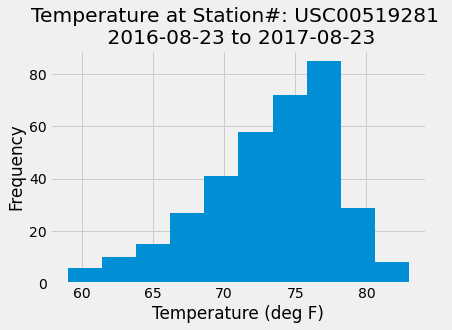

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_last12mo_query=session.query(measurement.tobs).filter(measurement.station==top_station).filter(measurement.date > twelve_mo_before).all()
temp_last12mo=[]
for t in temp_last12mo_query:
    temp_last12mo.append(t[0])
plt.hist(temp_last12mo)
plt.xlabel('Temperature (deg F)')
plt.ylabel('Frequency')
plt.title(f'Temperature at Station#: {top_station} \n {twelve_mo_before} to {most_recent_date}')

# Close Session

In [ ]:
# Close Session
session.close()